In [40]:
from datetime import date, datetime, timedelta

import requests
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [3]:
#def get_all_response_objects(start_year, end_year):

def get_all_response_objects(latitude, longitude, birthday):
    responses = []
    
    for year in range(1960,2024):
        request_date = date(year, birthday.month, birthday.day)
        response = get_api_response(latitude,longitude, request_date)
        responses.append(response)
    return responses

In [4]:
# helper function for 15 date range
def get_date_range(birthday):
    return {'start_date': birthday - timedelta(days=7),
           'end_date':birthday + timedelta(days=7)}

In [30]:
 def get_api_response(latitude,longitude,birthday):
    url = "https://archive-api.open-meteo.com/v1/archive"
    
    date_range = get_date_range(birthday)
    # print(f"start range:{date_range['start_date']}, end_date:{date_range['end_date']}")
    
    
    params = {'latitude':latitude,
             'longitude':longitude,
             'start_date':date_range['start_date'],
             'end_date': date_range['end_date'],
             'daily':['temperature_2m_max','temperature_2m_min','apparent_temperature_max','apparent_temperature_min','precipitation_sum'],
              'timezone':'auto',
              'temperature_unit':'fahrenheit',
              'precipitation_unit':'inch'
             }
    r = requests.get(url, params=params)
    response = r.json()
    
    return response

    
    

In [27]:
# birthday = datetime.strptime('10-19-1991', '%m-%d-%Y').date()
# print(birthday)
# api_return = get_api_response('42.50496','-83.15053',birthday)
# pprint(api_return)

In [28]:
# birthday = datetime.strptime('10-19-1991', '%m-%d-%Y').date()
# print(birthday)
# api_return_all = get_all_response_objects('42.50496','-83.15053',birthday)
# pprint(api_return_all)



In [22]:
def geocode_location(city, country):    
    base_url = 'https://geocode.xyz/'
    json = 1
    api_key = '570727133469772668260x90730'
    request_url = f"{base_url}{city},+{country}?json={json}&auth={api_key}"
    r = requests.get(request_url)
    result = r.json()
    latitude=float(result['latt'])
    longitude=float(result['longt'])
    return latitude, longitude
geocode_location('Charlotte', 'United States of America')

(35.2006, -80.81517)

In [33]:
def parse_json_response(responses):
    df=pd.DataFrame(responses)
    df = df.join(pd.json_normalize(df['daily'])).drop(columns=['daily'])
    df
    
#     display(df)
    
    
#     daily_average_apparent_temperature_max = []
#     for response in responses: 
#         average_apparent_temperature_max = np.mean(response['daily']['apparent_temperature_max'])
#         daily_average_apparent_temperature_max.append(average_apparent_temperature_max)
    
    measures = ["temperature_2m_max", "temperature_2m_min", "apparent_temperature_max", "apparent_temperature_min", "precipitation_sum"]
 
    #df2["temperature_2m_max_mean"] = np.mean(df2['temperature_2m_max'])
                                            
    
    
#     daily_average_apparent_temperature_max = []
#     for response in responses: 
#         average_apparent_temperature_max = np.mean(response['daily']['apparent_temperature_max'])
#         daily_average_apparent_temperature_max.append(average_apparent_temperature_max)
    
    measures = ["temperature_2m_max", "temperature_2m_min", "apparent_temperature_max", "apparent_temperature_min", "precipitation_sum"]                                               
                                               
                                               
#     df["temperature_2m_max_mean"] = np.mean(df['temperature_2m_max'])
#     print( df["temperature_2m_max_mean"])

    for col in measures:
         df[f"{col}_mean"] = df[col].apply(np.mean)

#chop up time to add year column
    df['year'] =df['time'].apply(lambda x:x[7][:4])
    df=df[["temperature_2m_max_mean", "temperature_2m_min_mean", "apparent_temperature_max_mean", "apparent_temperature_min_mean", "precipitation_sum_mean", "year"]]
    # display(df)
    return df
    
# parse_json_response(api_return_all)

#    for col in measures:
#         df[f"{col}_mean"] = df[col].apply(np.mean)
    
    
    
    
# parse_json_response(api_return_all)




In [12]:
# helper functions
def get_user_birthday():
    birthday = input('Enter your birthday (MM/DD/YYYY): ')
    return datetime.strptime(birthday, "%m/%d/%Y")

def get_user_city_of_birth():
    city = input('Enter the city you were born in: ')
    country = input('Enter the country you were born in: ')
    return city , country

In [24]:
# write your solution here
def get_data():
    birthday = get_user_birthday()
    city, country = get_user_city_of_birth()
    latitude,longitude =geocode_location(city, country)
    responses = get_all_response_objects(latitude, longitude, birthday)
    final_df= parse_json_response(responses)
    return final_df

In [34]:
df = get_data()

df.head()

Enter your birthday (MM/DD/YYYY):  07/13/1994
Enter the city you were born in:  Charlotte
Enter the country you were born in:  United States of America


,temperature_2m_max_mean,temperature_2m_min_mean,apparent_temperature_max_mean,apparent_temperature_min_mean,precipitation_sum_mean,year
0,86.173333,68.973333,90.646667,72.246667,0.060200,1960
1,84.986667,67.746667,90.893333,70.926667,0.077400,1961
2,87.973333,70.000000,94.926667,74.300000,0.049667,1962
3,84.073333,66.366667,89.113333,69.600000,0.199267,1963
4,84.093333,67.960000,89.746667,71.826667,0.375000,1964


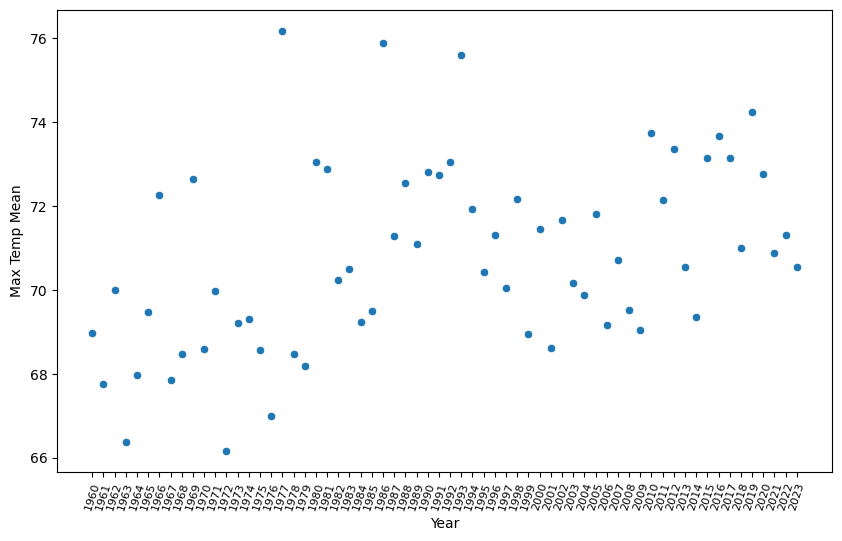

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['year'],y=df['temperature_2m_min_mean'])
plt.xticks(rotation=72)
plt.xticks(fontsize=8)
plt.xlabel('Year')
plt.ylabel('Max Temp Mean')
plt.show()

Scatter plot above shows a vague positive correlation in the mean of the maximum daily temperature through the time period given, with a few noteable outliers as the exception.

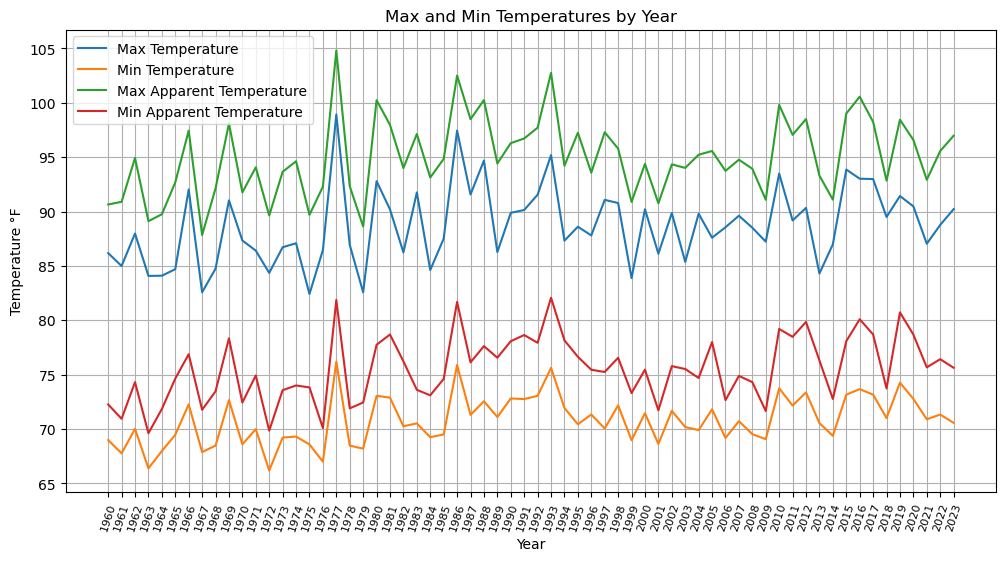

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='temperature_2m_max_mean', label='Max Temperature')
sns.lineplot(data=df, x='year', y='temperature_2m_min_mean', label='Min Temperature')
sns.lineplot(data=df, x='year', y='apparent_temperature_max_mean', label='Max Apparent Temperature')
sns.lineplot(data=df, x='year', y='apparent_temperature_min_mean', label='Min Apparent Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature °F')
plt.title('Max and Min Temperatures by Year')
plt.xticks(rotation=72)
plt.xticks(fontsize=8)
plt.legend()
plt.grid(True)
plt.show()

The minimum and maximum temperatures for actual and apparent temperatures follow near identical patterns which demonstrates the change in temperature being near identical to how it feels 
Additionally the apparent temperature also known as the "Feels Like" Temperature is always higher than the actual temperature by a varying amount, most noticably during 2016.